# Ahmed Mohamed Abdel-Rashied 200180028

---


# Milad abdo galil            20180302
---
# farrag mohamed farrag       20180197
---
# Eslam Nasser Ghoneim        20180047
--- 

In [ ]:
! pip install kaggle
from scipy.signal import lfilter, decimate
from scipy import signal
from scipy.signal import butter
import numpy as np
import keras
from keras import layers
from scipy.io import loadmat
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
! mkdir ~/.kaggle


In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle competitions download decoding-the-human-brain

  0% 0.00/31.7k [00:00<?, ?B/s]
100% 31.7k/31.7k [00:00<00:00, 24.6MB/s]
100% 968M/970M [00:10<00:00, 130MB/s]
100% 970M/970M [00:10<00:00, 98.6MB/s]
100% 1.42G/1.42G [00:20<00:00, 24.3MB/s]
100% 1.42G/1.42G [00:20<00:00, 73.4MB/s]
100% 1.63G/1.64G [00:41<00:00, 30.7MB/s]
100% 1.64G/1.64G [00:42<00:00, 41.9MB/s]
100% 1.42G/1.43G [00:33<00:00, 24.1MB/s]
100% 1.43G/1.43G [00:33<00:00, 45.7MB/s]


In [ ]:
!unzip '/content/train_13_16.zip'

Archive:  /content/train_13_16.zip
  inflating: data/train_subject13.mat  
  inflating: data/train_subject14.mat  
  inflating: data/train_subject15.mat  
  inflating: data/train_subject16.mat  


In [ ]:
!unzip '/content/train_01_06.zip'

Archive:  /content/train_01_06.zip
  inflating: data/train_subject01.mat  
  inflating: data/train_subject02.mat  
  inflating: data/train_subject03.mat  
  inflating: data/train_subject04.mat  
  inflating: data/train_subject05.mat  
  inflating: data/train_subject06.mat  


In [ ]:
!unzip '/content/train_07_12.zip'

Archive:  /content/train_07_12.zip
  inflating: data/train_subject07.mat  
  inflating: data/train_subject08.mat  
  inflating: data/train_subject09.mat  
  inflating: data/train_subject10.mat  
  inflating: data/train_subject11.mat  
  inflating: data/train_subject12.mat  


In [ ]:
def plot(data,data_mod):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    ax3 = fig.add_subplot(312)
    
    ax1.plot([f for f in range(375)],data[1,7])
    ax2.plot([f for f in range(375)],data[1,8])
    ax3.plot([f for f in range(375)],data[1,9])
    plt.show()
    
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    ax3 = fig.add_subplot(312)
    
    ax1.plot([f for f in range(375)],data_mod[1,7])
    ax2.plot([f for f in range(375)],data_mod[1,8])
    ax3.plot([f for f in range(375)],data_mod[1,9])
    plt.show()

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def loadData(filename,
             downsample = 8, 
             start = 130, 
             stop = 375):

    print ("Loading " + filename + "...")
    data = loadmat(filename, squeeze_me=True)
    X = data['X']
    X=butter_bandpass_filter(X, 1, 20, data['sfreq'], order=5)
    # Class labels available only for training data.
    try:
        y = data['y']
    except:
        y = None
    # Decimate the time dimension (lowpass filtering + resampling)
    print("x before  Decimate"+str(X.shape))
    X = decimate(X, downsample)
    print("x after  Decimate"+str(X.shape))
    # Extract only the requested. time span
    startIdx = int(start / float(downsample) + 0.5)
    stopIdx  = int(stop / float(downsample) + 0.5)
    print(f'start : {startIdx} , stop: {stopIdx}')
    X = X[..., startIdx:stopIdx]
    X = X - np.mean(X, axis = 0)
    X = X / np.std(X, axis = 0)
    
    return X, y

In [ ]:
import os
paths=[]
for dirname, _, filenames in os.walk('/content/data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))

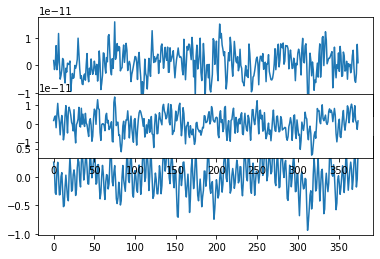

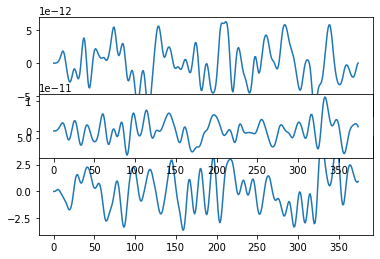

In [ ]:
data = loadmat(str(paths[0]), squeeze_me=True)
plot(data["X"],butter_bandpass_filter(data["X"], 1, 20, data['sfreq'], order=5))

In [ ]:
paths

['/content/data/train_subject07.mat',
 '/content/data/train_subject03.mat',
 '/content/data/train_subject16.mat',
 '/content/data/train_subject12.mat',
 '/content/data/train_subject09.mat',
 '/content/data/train_subject06.mat',
 '/content/data/train_subject10.mat',
 '/content/data/train_subject14.mat',
 '/content/data/train_subject11.mat',
 '/content/data/train_subject04.mat',
 '/content/data/train_subject01.mat',
 '/content/data/train_subject15.mat',
 '/content/data/train_subject13.mat',
 '/content/data/train_subject08.mat',
 '/content/data/train_subject05.mat',
 '/content/data/train_subject02.mat']

In [ ]:
train_x=[]
train_y=[]

for i in range(0,len(paths)):
    x,y =loadData(paths[i],downsample = 8, 
             start = 130, 
             stop = 375)
    train_x.append(x)
    train_y.append(y)

Loading /content/data/train_subject07.mat...
x before  Decimate(588, 306, 375)
x after  Decimate(588, 306, 47)
start : 16 , stop: 47
Loading /content/data/train_subject03.mat...
x before  Decimate(578, 306, 375)
x after  Decimate(578, 306, 47)
start : 16 , stop: 47
Loading /content/data/train_subject16.mat...
x before  Decimate(590, 306, 375)
x after  Decimate(590, 306, 47)
start : 16 , stop: 47
Loading /content/data/train_subject12.mat...
x before  Decimate(586, 306, 375)
x after  Decimate(586, 306, 47)
start : 16 , stop: 47
Loading /content/data/train_subject09.mat...
x before  Decimate(594, 306, 375)
x after  Decimate(594, 306, 47)
start : 16 , stop: 47
Loading /content/data/train_subject06.mat...
x before  Decimate(588, 306, 375)
x after  Decimate(588, 306, 47)
start : 16 , stop: 47
Loading /content/data/train_subject10.mat...
x before  Decimate(590, 306, 375)
x after  Decimate(590, 306, 47)
start : 16 , stop: 47
Loading /content/data/train_subject14.mat...
x before  Decimate(588, 

In [ ]:
train_x=np.vstack(train_x)
train_y=np.concatenate(train_y)

In [ ]:
train_x.shape

(9414, 306, 31)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
train_idex=8000
clf2 = RandomForestClassifier(n_estimators = 1000, n_jobs = 1,criterion='entropy')


In [ ]:
clf2.fit(train_x[:8000].reshape((8000, 306*31)),train_y[:8000])

RandomForestClassifier(criterion='entropy', n_estimators=1000, n_jobs=1)

In [ ]:
yHat = clf2.predict(train_x[8000:].reshape((len(train_x)-8000, 306*31)))

In [ ]:
np.mean(yHat == train_y[8000:])

0.6541725601131542

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
acc = accuracy_score(train_y[8000:], yHat)

print("Accuracy score: {}".format(acc))
print(confusion_matrix(train_y[8000:], yHat))
print(classification_report(train_y[8000:], yHat, target_names={'class0',
                    'class 1',}))


Accuracy score: 0.6541725601131542
[[460 246]
 [243 465]]
              precision    recall  f1-score   support

      class0       0.65      0.65      0.65       706
     class 1       0.65      0.66      0.66       708

    accuracy                           0.65      1414
   macro avg       0.65      0.65      0.65      1414
weighted avg       0.65      0.65      0.65      1414



In [ ]:
! unzip /content/test_17_23.zip

Archive:  /content/test_17_23.zip
  inflating: data/test_subject17.mat  
  inflating: data/test_subject18.mat  
  inflating: data/test_subject19.mat  
  inflating: data/test_subject20.mat  
  inflating: data/test_subject21.mat  
  inflating: data/test_subject22.mat  
  inflating: data/test_subject23.mat  


In [ ]:
import os
paths=[]
for x in range(17,24):
    paths.append(f'/content/data/test_subject{x}.mat')


In [ ]:
test_x=[]
test_y=[]

for i in range(0,len(paths)):
    x,y =loadData(paths[i],downsample = 8, 
             start = 130, 
             stop = 375)
    test_x.append(x)
    test_y.append(y)

Loading /content/data/test_subject17.mat...
x before  Decimate(594, 306, 375)
x after  Decimate(594, 306, 47)
start : 16 , stop: 47
Loading /content/data/test_subject18.mat...
x before  Decimate(584, 306, 375)
x after  Decimate(584, 306, 47)
start : 16 , stop: 47
Loading /content/data/test_subject19.mat...
x before  Decimate(586, 306, 375)
x after  Decimate(586, 306, 47)
start : 16 , stop: 47
Loading /content/data/test_subject20.mat...
x before  Decimate(584, 306, 375)
x after  Decimate(584, 306, 47)
start : 16 , stop: 47
Loading /content/data/test_subject21.mat...
x before  Decimate(532, 306, 375)
x after  Decimate(532, 306, 47)
start : 16 , stop: 47
Loading /content/data/test_subject22.mat...
x before  Decimate(588, 306, 375)
x after  Decimate(588, 306, 47)
start : 16 , stop: 47
Loading /content/data/test_subject23.mat...
x before  Decimate(590, 306, 375)
x after  Decimate(590, 306, 47)
start : 16 , stop: 47


In [ ]:
np.vstack(test_x)
y_pred=clf2.predict(np.vstack(test_x).reshape((len(np.vstack(test_x)), 306*31)))

In [ ]:
data= pd.read_csv("/content/random_submission.csv")
data['Prediction']=y_pred

data

,Id,Prediction
0,17000,0
1,17001,1
2,17002,1
3,17003,1
4,17004,1
...,...,...
4053,23585,0
4054,23586,0
4055,23587,0
4056,23588,0


In [ ]:
data.to_csv('/content/submission3.csv',index=False)
